## Contents

01. Creating bar charts
02. Creating histograms and scatterplots
03. Sampling data
04. Creating line charts
05. Exporting graphs



Visualization libraries

Seaborn: a library dedicated to visualizations
Matplotlib: a plotting library and dependency for seaborn
Scipy: a fundamental Python library necessary for visualizations

To install the visualization libraries, type the command below into your terminal on a Mac 

conda install seaborn matplotlib scipy 

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#import data

path = r'/Users/lindazhang/Instacart Basket Analysis'
ords_prods_agg = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))



In [3]:
ords_prods_agg.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,order_added_to_cart,reordered,product_name,...,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since_prior_order,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regularly busy,Regularly busy,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regularly busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regularly busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Least busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Least busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## 01. Creating bar charts

<AxesSubplot:>

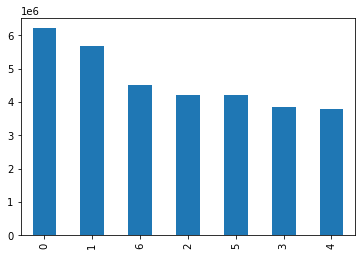

In [4]:
ords_prods_agg['orders_day_of_week'].value_counts().plot.bar()

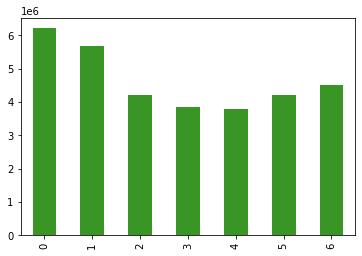

In [5]:
# If you want to sort the bars in index order

bar = ords_prods_agg['orders_day_of_week'].value_counts().sort_index().plot.bar(color = '#399625')


In [6]:
# You can use the same sort function to print frequencies

ords_prods_agg['orders_day_of_week'].value_counts().sort_index()

0    6209410
1    5665604
2    4217610
3    3843929
4    3787042
5    4209334
6    4500101
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

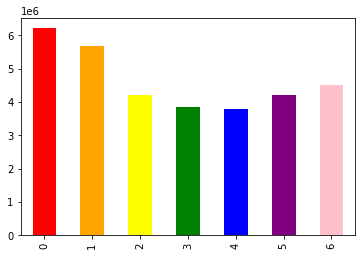

In [7]:
# Here's how you can change the color of the bars

ords_prods_agg['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red','orange','yellow','green','blue','purple','pink'])

## 02. Creating histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

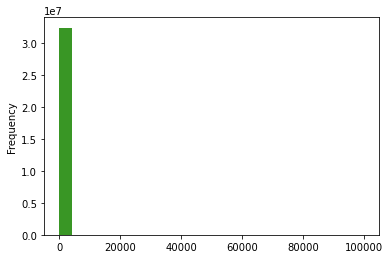

In [8]:
# The bins tells Python how many bars you would like to have

ords_prods_agg['prices'].plot.hist(bins = 25, color = '#399625')

In [9]:
# Use the describe function to see why your histogram looks weird. 
# It's clear that the max price of 99,999 is throwing off the chart 

ords_prods_agg['prices'].describe()

count    3.243303e+07
mean     1.198133e+01
std      4.954401e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

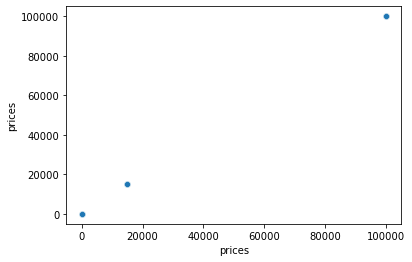

In [10]:
# You can use a scatter plot to further investigate your data 
# Scatterplots are created by the scatterplot() function, which is included in the seaborn library (sns)

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_agg)

In [11]:
# You can try to find the products that are above the normal price of supermarket items (say $100)
# Looks like there are 5127 products with prices greater than $100

ords_prods_agg.loc[ords_prods_agg['prices'] > 100]


,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,order_added_to_cart,reordered,product_name,...,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since_prior_order,customer_frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Regularly busy,12pm-5pm,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Regularly busy,12pm-5pm,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Regularly busy,6pm-11pm,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Busiest day,Busiest days,6am-11am,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly busy,Busiest days,6pm-11pm,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29192190,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,Busiest day,Busiest days,6am-11am,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29192191,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,Busiest day,Busiest days,6am-11am,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29192192,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,Regularly busy,Slowest days,12pm-5pm,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29192193,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,Regularly busy,Slowest days,6pm-11pm,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
# To get a better histogram, let's remove the outliers for now 
# The command below looks for values above 100 within the “prices” column and assigns them a value. 
#In this case, that new value is np.nan

ords_prods_agg.loc[ords_prods_agg ['prices'] >100, 'prices'] = np.nan

In [13]:
# To check that the command worked, you can check for max price. 

ords_prods_agg['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

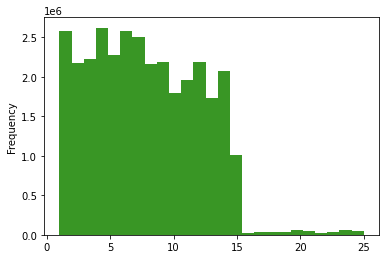

In [14]:
# Histogram after data clean

ords_prods_agg['prices'].plot.hist(bins = 25,color = '#399625')

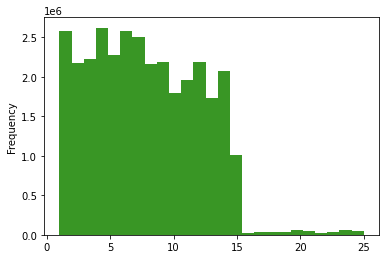

In [15]:
# Increase granularity

hist = ords_prods_agg['prices'].plot.hist(bins = 25,color = '#399625')

## 03. Sampling data


Let's say you want to do a 70/30 split where 30 percent sample would statistically resemble the 70 percent sample but contain less rows.

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio.

In [16]:
# Create a list holding True/False values to the test np.random.rand(len(ords_prods_agg)) <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_agg)) <= 0.7

1. In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”). The value you put inside the seed doesn’t actually matter. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible

2. In the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7.

3. The np.random.rand() function is what creates a list of random floating numbers between 0 and 1. The np at the beginning stands for the NumPy library, the random in the middle is a function that creates random numbers, and the rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution. Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur in the distribution.

4. len() produces a value that represents the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,404,859, which is how many rows are in your dataframe.

In [17]:
# Simple example of np.random.rand()
# As you can see, the np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced. 
# In the code above, the argument given is the length of your dataframe, so 32,434,212 numbers are produced.

np.random.rand(10)

array([0.92399799, 0.11106333, 0.52502601, 0.73987585, 0.08487082,
       0.80157589, 0.33861972, 0.85202624, 0.71023929, 0.28256732])

In [18]:
# Store 70% of the sample in the dataframe big. 

big = ords_prods_agg[dev]

# Store 30% of the sample in the dataframe small.
#The tilde negates the argument and basically yells you to store everything that is not dev, or False. 

small = ords_prods_agg[~dev]

In [19]:
# check that the subsetting was run correctly

len(big)+ len(small)

32433030

## 04. Creating line charts

In [20]:
df_2 = small[['orders_day_of_week','prices']]

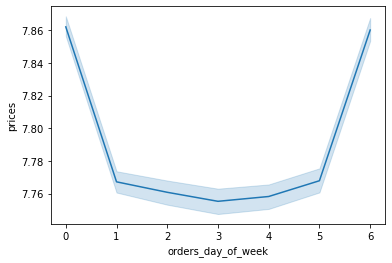

In [21]:
# Create a line chart from df_2 and place day of the week on the x axis and prices on the y axis 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')


The translucent blue bands around the line are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

## 05. Exporting graphs

In [22]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [23]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [24]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_and_prices.png'))